# England School Performance & Demographics Analysis  

## Notebook 02 — Initial EDA  

|Field | Description                   |
|:--------|:---------------------------|
| Author:      | Robert Steven Elliott | 
| Methodology: | CRISP-DM              |  
| Date:        | February 2026         |

## Objective of this Notebook

This notebook performs initial exploratory data analysis (EDA) on:

- Five-Year Ofsted Inspection Data
- Ofsted Inspections Dataset


The aim is to:

- Understand dataset structure
- Identify data quality issues
- Examine distributions
- Explore key inspection outcomes
- Identify early patterns for hypothesis development

## Load Libraries

In [1]:
import sys
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [2]:

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

## Define Paths and Change Working Directory

In [3]:
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"
EXTRACTED_DATA_DIR = DATA_DIR / "extracted"

sys.path.append(str(PROJECT_ROOT))
print("✅ Working directory set to project root:", PROJECT_ROOT)

✅ Working directory set to project root: /home/robert/projects/education


## Load Datasets

In [4]:
ofsted = pd.read_csv(EXTRACTED_DATA_DIR / "ofsted_inspections.csv")

## Overview of Each Dataset

In [5]:
ofsted.head()

,urn,laestab,school_name,ofsted_phase,type_of_education,ofsted_region,region,local_authority,multi-academy_trust_uid,multi-academy_trust_name,idaci_quintile,total_pupils,statutory_lowest_age,statutory_highest_age,inspection_date,publication_date,overall_effectiveness,quality_of_education,behaviour_attitudes,personal_development,leadership_management,safeguarding_effective,early_years_grade,sixth_form_grade
0,100000,2013614,The Aldgate School,Primary,Voluntary Aided School,London,London,City of London,NaN,NaN,4.00,249.00,3.00,11.00,2024-06-12,2024-07-11,1,1.00,1.00,1.00,1.00,Yes,2.00,9.00
1,100005,2021048,Thomas Coram Centre,Nursery,LA Nursery School,London,London,Camden,NaN,NaN,3.00,116.00,2.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100006,2021100,Heath School,Alternative provision,Pupil Referral Unit,London,London,Camden,NaN,NaN,3.00,31.00,11.00,16.00,2024-06-05,2024-07-04,2,2.00,1.00,1.00,1.00,Yes,9.00,9.00
3,100007,2021101,Camden Primary Pupil Referral Unit,Alternative provision,Pupil Referral Unit,London,London,Camden,NaN,NaN,4.00,19.00,5.00,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100008,2022019,Argyle Primary School,Primary,Community School,London,London,Camden,NaN,NaN,4.00,278.00,3.00,11.00,2022-10-04,2022-11-17,2,2.00,2.00,1.00,2.00,Yes,2.00,9.00


In [6]:

ofsted.info()

<class 'pandas.DataFrame'>
RangeIndex: 21966 entries, 0 to 21965
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   urn                       21966 non-null  int64  
 1   laestab                   21966 non-null  int64  
 2   school_name               21966 non-null  str    
 3   ofsted_phase              21966 non-null  str    
 4   type_of_education         21966 non-null  str    
 5   ofsted_region             21966 non-null  str    
 6   region                    21966 non-null  str    
 7   local_authority           21966 non-null  str    
 8   multi-academy_trust_uid   10948 non-null  float64
 9   multi-academy_trust_name  10948 non-null  str    
 10  idaci_quintile            21845 non-null  float64
 11  total_pupils              21931 non-null  float64
 12  statutory_lowest_age      21963 non-null  float64
 13  statutory_highest_age     21963 non-null  float64
 14  inspection_date  

In [7]:

ofsted.describe(include="all")


,urn,laestab,school_name,ofsted_phase,type_of_education,ofsted_region,region,local_authority,multi-academy_trust_uid,multi-academy_trust_name,idaci_quintile,total_pupils,statutory_lowest_age,statutory_highest_age,inspection_date,publication_date,overall_effectiveness,quality_of_education,behaviour_attitudes,personal_development,leadership_management,safeguarding_effective,early_years_grade,sixth_form_grade
count,21966.00,21966.00,21966,21966,21966,21966,21966,21966,10948.00,10948,21845.00,21931.00,21963.00,21963.00,13074,13074,13074,13074.00,13074.00,13074.00,13074.00,13074,13074.00,13074.00
unique,NaN,NaN,20246,5,21,8,9,153,NaN,1247,NaN,NaN,NaN,NaN,456,992,5,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,St Joseph's Catholic Primary School,Primary,Academy Converter,South East,South East,Lancashire,NaN,UNITED LEARNING TRUST,NaN,NaN,NaN,NaN,2024-10-01,2022-09-21,2,NaN,NaN,NaN,NaN,Yes,NaN,NaN
freq,NaN,NaN,52,16711,7747,3383,3383,626,NaN,95,NaN,NaN,NaN,NaN,172,212,7397,NaN,NaN,NaN,NaN,12977,NaN,NaN
mean,130382.55,6998512.17,NaN,NaN,NaN,NaN,NaN,NaN,9498.13,NaN,3.03,384.03,4.83,12.00,NaN,NaN,NaN,2.02,1.83,1.77,1.97,NaN,3.80,8.14
std,16177.43,2626679.22,NaN,NaN,NaN,NaN,NaN,NaN,6458.45,NaN,1.41,365.15,3.01,3.07,NaN,NaN,NaN,0.56,0.55,0.53,0.57,NaN,3.20,2.35
min,100000.00,2013614.00,NaN,NaN,NaN,NaN,NaN,NaN,2044.00,NaN,1.00,0.00,0.00,4.00,NaN,NaN,NaN,1.00,1.00,1.00,1.00,NaN,0.00,0.00
25%,115913.25,3712201.50,NaN,NaN,NaN,NaN,NaN,NaN,3540.00,NaN,2.00,164.00,3.00,11.00,NaN,NaN,NaN,2.00,2.00,1.00,2.00,NaN,2.00,9.00
50%,137099.50,8503176.50,NaN,NaN,NaN,NaN,NaN,NaN,5385.00,NaN,3.00,244.00,4.00,11.00,NaN,NaN,NaN,2.00,2.00,2.00,2.00,NaN,2.00,9.00
75%,144179.50,8912352.75,NaN,NaN,NaN,NaN,NaN,NaN,16572.00,NaN,4.00,445.00,5.00,11.00,NaN,NaN,NaN,2.00,2.00,2.00,2.00,NaN,9.00,9.00


In [8]:
ofsted.isna().sum().sort_values(ascending=False)


multi-academy_trust_name    11018
multi-academy_trust_uid     11018
overall_effectiveness        8892
quality_of_education         8892
publication_date             8892
inspection_date              8892
behaviour_attitudes          8892
personal_development         8892
leadership_management        8892
safeguarding_effective       8892
early_years_grade            8892
sixth_form_grade             8892
idaci_quintile                121
total_pupils                   35
statutory_lowest_age            3
statutory_highest_age           3
local_authority                 0
region                          0
ofsted_region                   0
type_of_education               0
ofsted_phase                    0
school_name                     0
laestab                         0
urn                             0
dtype: int64

## Data Cleaning for EDA

In [9]:
ofsted["overall_effectiveness"] = (
    ofsted["overall_effectiveness"]
    .replace("Not judged", np.nan)
)

ofsted = ofsted.dropna(subset=["overall_effectiveness"])
ofsted["overall_effectiveness"] = ofsted["overall_effectiveness"].astype("int64")

## Distribution of Ofsted Ratings

### Overall Effectiveness Counts

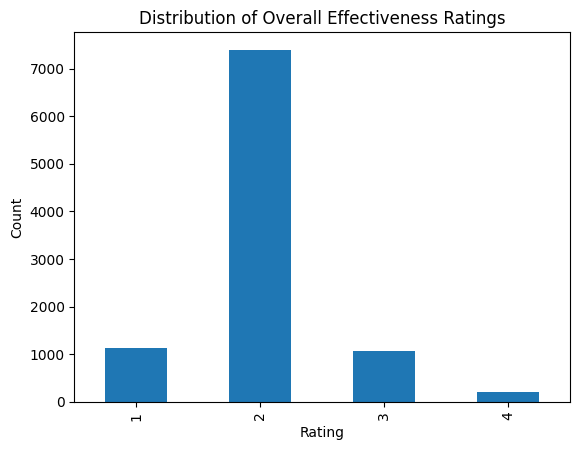

In [10]:
rating_counts = ofsted["overall_effectiveness"].value_counts().sort_index()

plt.figure()
rating_counts.plot(kind="bar")
plt.title("Distribution of Overall Effectiveness Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Ratings Over Time

In [11]:
ofsted["inspection_date"] = pd.to_datetime(
    ofsted["inspection_date"], 
    errors="coerce"
)

ofsted["Year"] = ofsted["inspection_date"].dt.year


<Figure size 640x480 with 0 Axes>

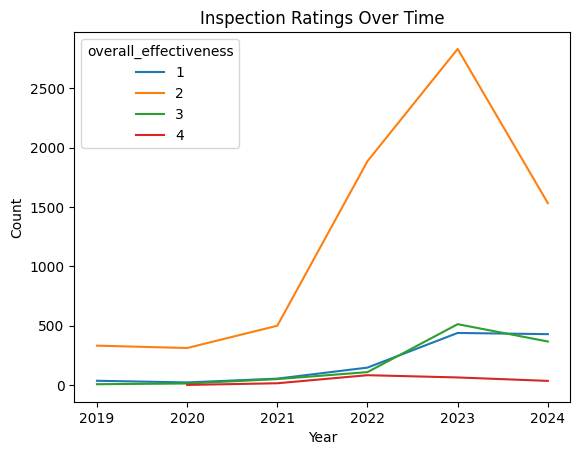

In [12]:
yearly = (
    ofsted.groupby("Year")["overall_effectiveness"]
    .value_counts()
    .unstack()
)

plt.figure()
yearly.plot()
plt.title("Inspection Ratings Over Time")
plt.ylabel("Count")
plt.show()


## Regional Analysis

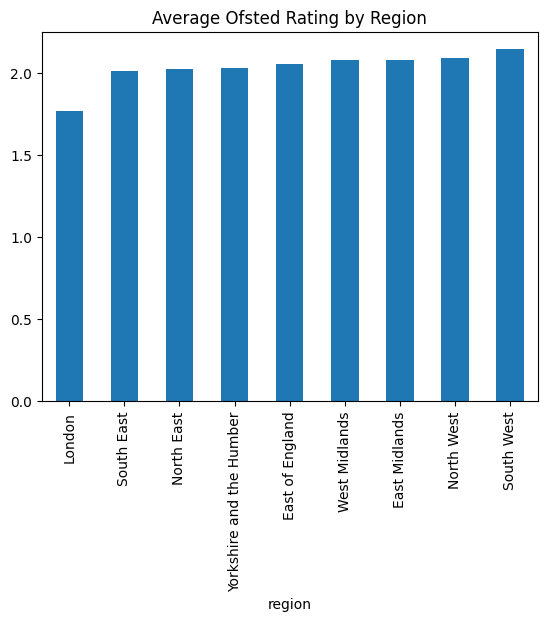

In [13]:
region_ratings = (
    ofsted.groupby("region")["overall_effectiveness"]
    .mean()
    .sort_values()
)

plt.figure()
region_ratings.plot(kind="bar")
plt.title("Average Ofsted Rating by Region")
plt.show()


## Duplicate URN Check

In [14]:
ofsted["urn"].duplicated().sum()


np.int64(0)